<h1>Lab 2: Confidence Intervals and Hypothesis Testing</h1>

Import Packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from plotnine import *
from scipy.stats import skew

Revisit the normtemp dataset from lab 1 where we examined the observed mean body temperature (temperature) in comparison to the well-known "average" 98.6 degrees. Use the temperature variable to answer the following questions

In [3]:
temp = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/normtemp.csv", sep =' ')
temp.head()

,temperature,gender,hr
1,96.3,1,70
2,96.7,1,71
3,96.9,1,74
4,97.0,1,80
5,97.1,1,73


Perform a statistical test (alpha = .05) to determine whether this well-known number is actually the mean body temperature. What is your t-statistic? (round to 2 decimal places)

In [4]:
d = sm.stats.weightstats.DescrStatsW(temp['temperature'])
test_stat, p_val, df = d.ttest_mean(value=98.6, alternative='two-sided')

print(test_stat,p_val,df)

-5.4548232923645195 2.4106320415561276e-07 129.0


Give the 95% confidence interval for temperature.

In [5]:
d = sm.stats.weightstats.DescrStatsW(temp['temperature'])
d.tconfint_mean(0.05)

(98.12200290560801, 98.37645863285348)

If we restrict our analysis to only the females in this dataset, will our conclusion change?

In [6]:
d = sm.stats.weightstats.DescrStatsW(temp[temp['gender'] == 2]['temperature'])
d.tconfint_mean(0.05)

(98.20961890911848, 98.57807339857384)

In [7]:
d = sm.stats.weightstats.DescrStatsW(temp[temp['gender'] == 2]['temperature'])
test_stat, p_val, df = d.ttest_mean(value=98.6, alternative='two-sided')

print(test_stat,p_val,df)

-2.235498079678342 0.028880450789692733 64.0


The Airline dataset contains information regarding the number of international airline travelers (variable air) across different months of the year from 1949-1960. 

We are interested in knowing if during this time period there was a significant difference between air travel in the summer months (Jun, Jul, and Aug) vs the remainder of the year.

Use this data to answer the following questions:

In [4]:
airline = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/Airline.csv")
airline.head()

,Month,Year,Passenger
0,Jan,1949,112
1,Feb,1949,118
2,Mar,1949,132
3,Apr,1949,129
4,May,1949,121


What is the shape of the distribution for the number of passengers for the summer data?

In [7]:
summer_months = ['Jun', 'Jul', 'Aug']
airline_summer = airline[airline['Month'].isin(summer_months)]

remaining_year = ['Sep','Oct','Nov','Dec','Jan', 'Feb','Mar','Apr', 'May']
airline_nonsummer = airline[airline['Month'].isin(remaining_year)]



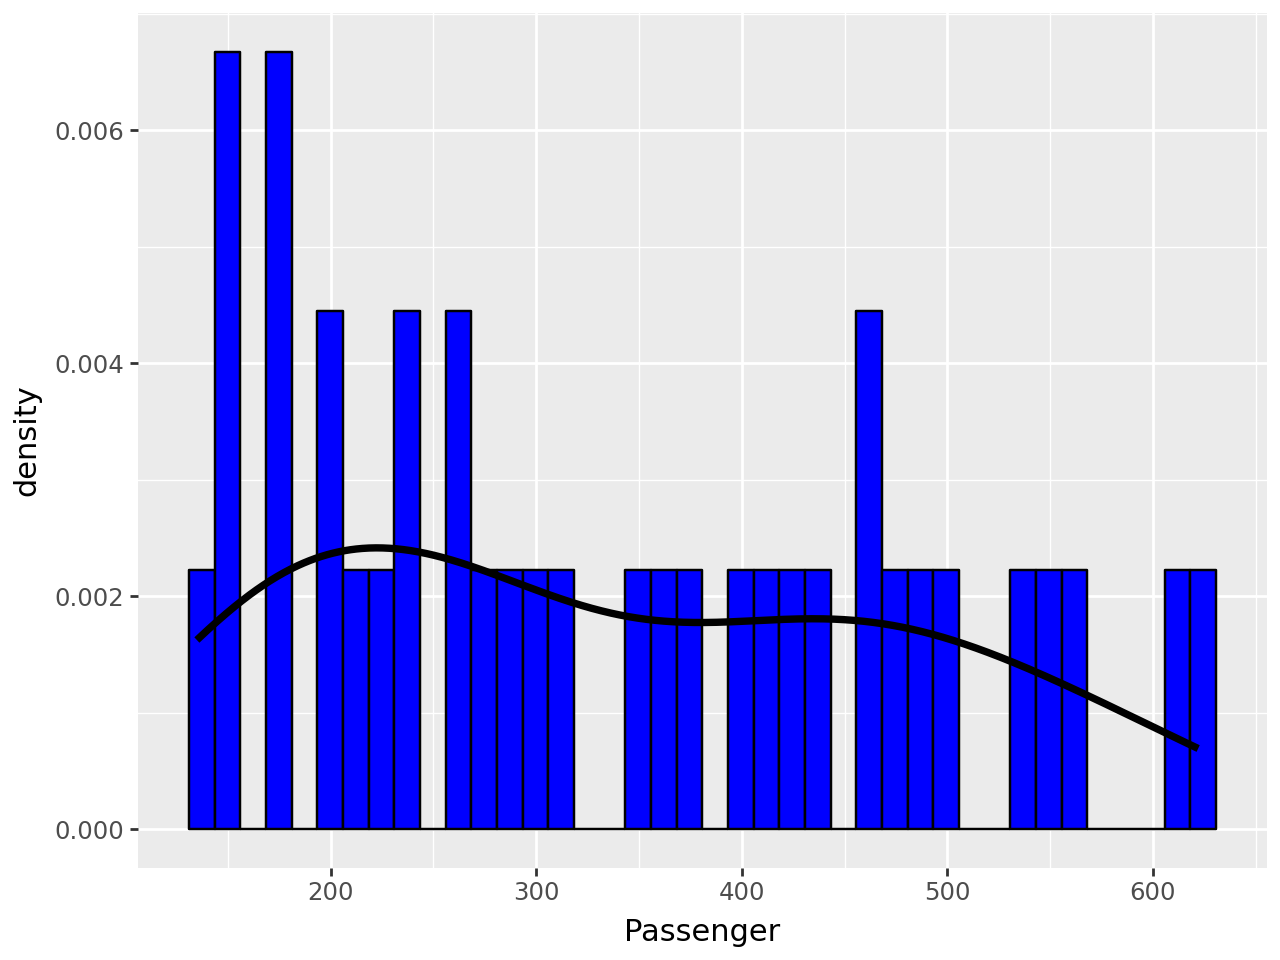

0.3074747596884999

In [11]:
p = (
ggplot(airline_summer, aes(x='Passenger')) +
geom_histogram(aes(y='..density..'), bins=40,
fill='blue', color='black') +
geom_density(color='black', size=1.5) 
)
p.show()

sp.stats.skew(airline_summer['Passenger'])

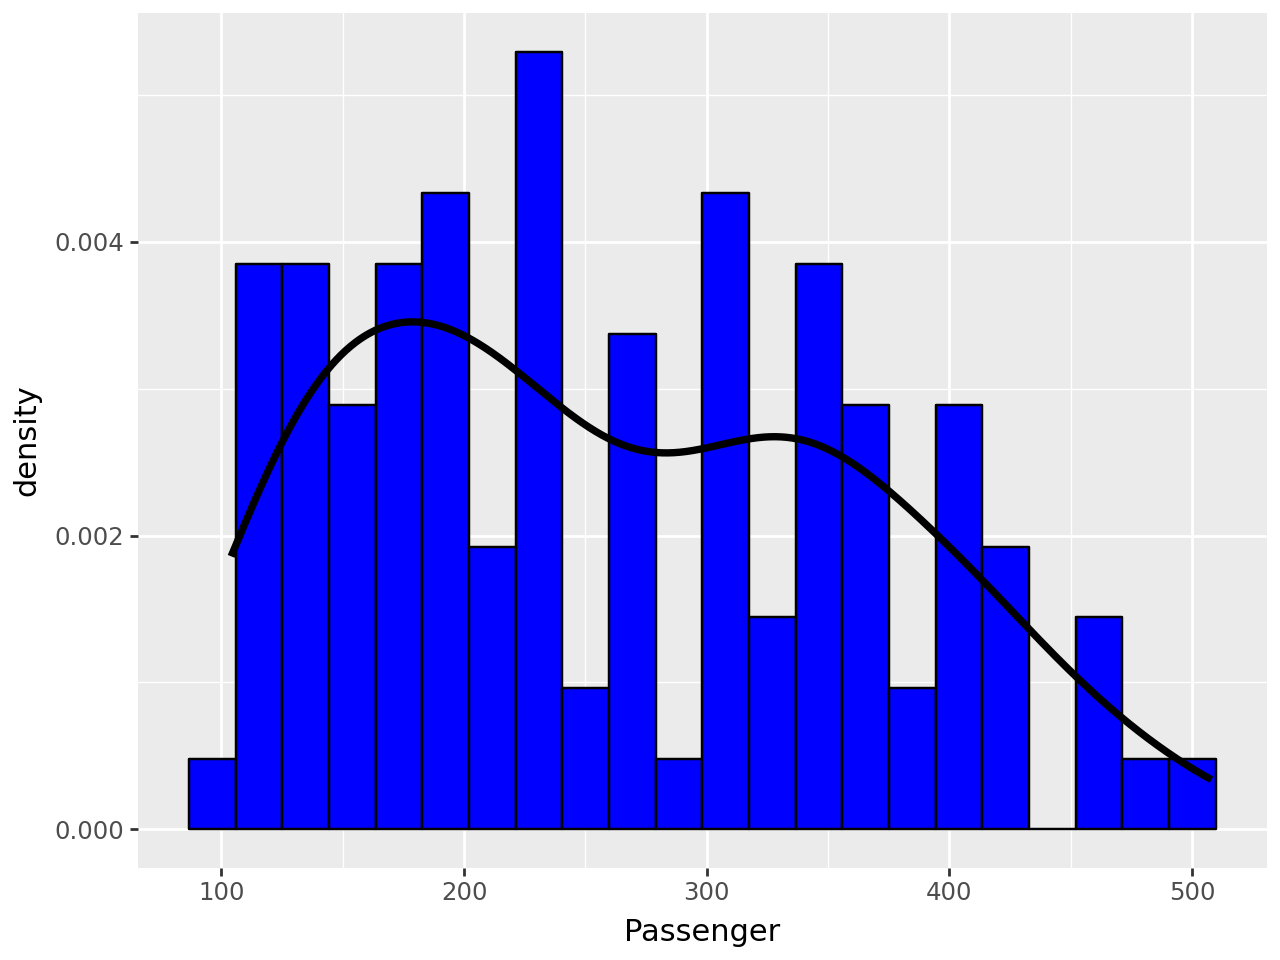

0.33264877004697196

In [12]:
p = (
ggplot(airline_nonsummer, aes(x='Passenger')) +
geom_histogram(aes(y='..density..'), bins=22,
fill='blue', color='black') +
geom_density(color='black', size=1.5) 
)
p.show()

sp.stats.skew(airline_nonsummer['Passenger'])


Are the distributions for the summer and nonsummer passenger data similar?

In [13]:
stat, p = stats.shapiro(airline_nonsummer["Passenger"])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")

stat, p = stats.shapiro(airline_summer['Passenger'])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")

Test Statistic = 0.9549
P-value = 0.0629
Test Statistic = 0.9398
P-value = 0.0500


Perform the Wilcoxon Rank sum test.

In [13]:
sp.stats.mannwhitneyu(airline_summer['Passenger'],airline_nonsummer['Passenger'])

MannwhitneyuResult(statistic=2541.5, pvalue=0.00587963988803492)